In [152]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#plt.rcParams['figure.figsize']=(10,10)

In [4]:
import plotly.express as px
import plotly.graph_objs as go

In [5]:
data=pd.read_csv('C:/Users/dell/OneDrive/Desktop/Finalpro/healthcare-dataset-stroke-data.csv')

In [6]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [7]:
data.shape

(5110, 12)

### Data Preparation
1.Missing values 

2.Feature Selection

3.Outlier Removal

4.Partitioning

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [43]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [10]:
#Filling missing values
data['bmi']=data['bmi'].fillna(data['bmi'].mean())

In [11]:
data['bmi'].isnull().sum()

0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [44]:
# Feature selection droping unwanted column
data.drop('id',axis=1,inplace=True)

<AxesSubplot:>

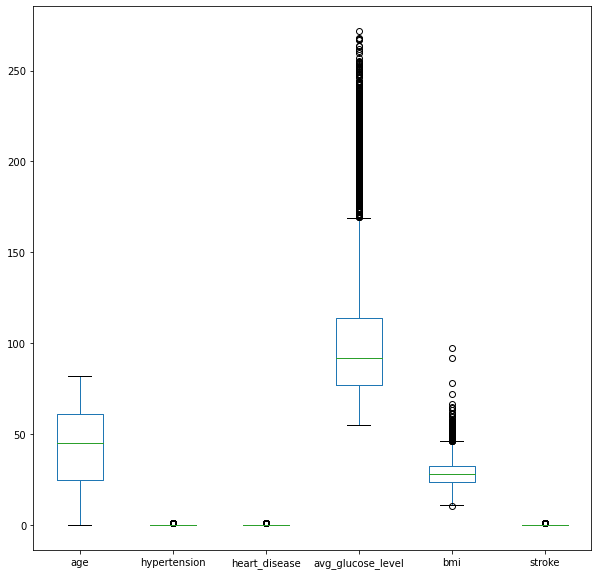

In [51]:
#Outlier removing
data.plot(kind='box')

##### We are not going to remove any outlier from avg_glucose_level and bmi beacuse they are the cause of stroke

In [14]:
x = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [15]:
x

array([['Male', 67.0, 0, ..., 228.69, 36.6, 'formerly smoked'],
       ['Female', 61.0, 0, ..., 202.21, 28.893236911794673,
        'never smoked'],
       ['Male', 80.0, 0, ..., 105.92, 32.5, 'never smoked'],
       ...,
       ['Female', 35.0, 0, ..., 82.99, 30.6, 'never smoked'],
       ['Male', 51.0, 0, ..., 166.29, 25.6, 'formerly smoked'],
       ['Female', 44.0, 0, ..., 85.28, 26.2, 'Unknown']], dtype=object)

# Data Visualization
1.count plot

2.Distribution plot

3.scatter plot

4.pair plot

### correlation

<AxesSubplot:>

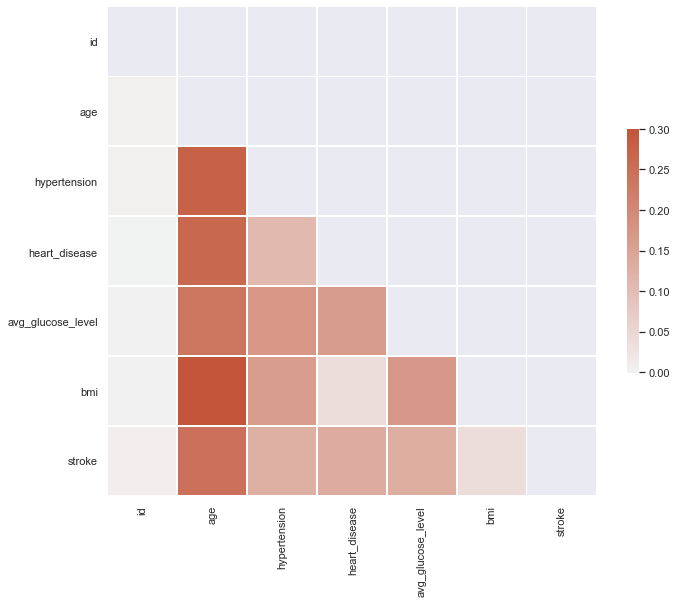

In [36]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


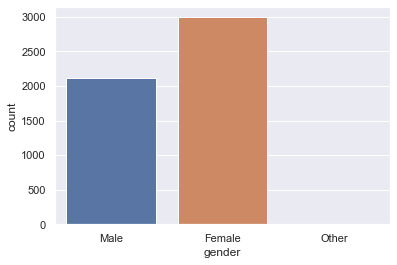

In [17]:
print(data.gender.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="gender")
plt.show()

0    4612
1     498
Name: hypertension, dtype: int64


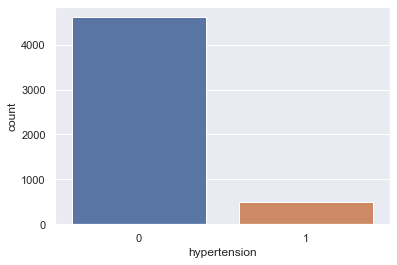

In [19]:
print(data.hypertension.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="hypertension")
plt.show()

Yes    3353
No     1757
Name: ever_married, dtype: int64


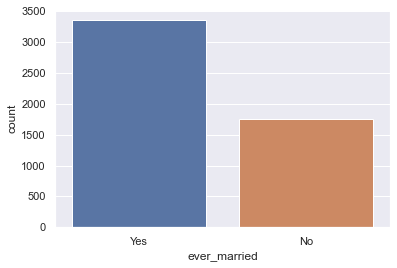

In [21]:
print(data.ever_married.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="ever_married")
plt.show()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


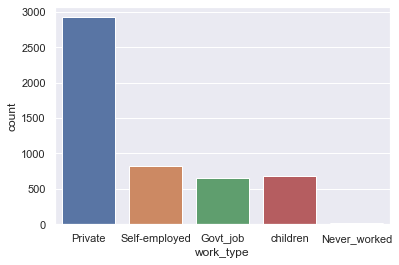

In [22]:
print(data.work_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="work_type")
plt.show()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


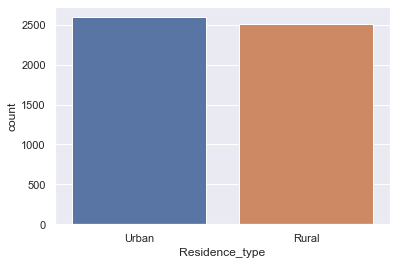

In [23]:
print(data.Residence_type.value_counts())
#sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="Residence_type")
plt.show()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


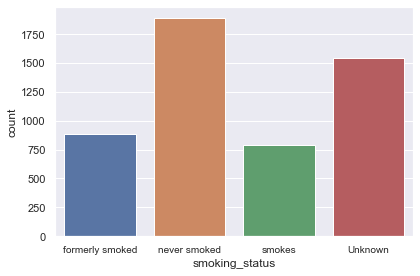

In [26]:
print(data.smoking_status.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

0    4861
1     249
Name: stroke, dtype: int64


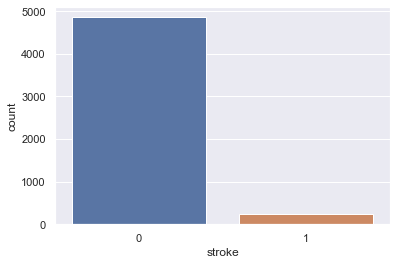

In [27]:
print(data.stroke.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=data, x="stroke")
plt.show()

### Avg glucose level

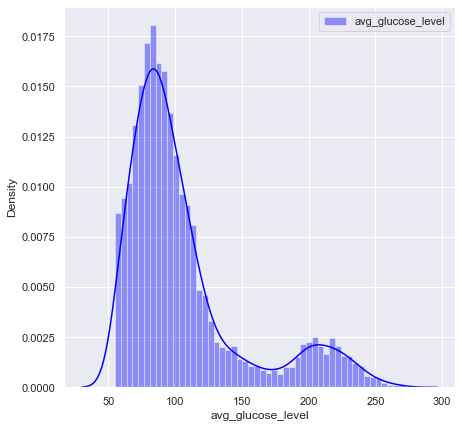

In [44]:
ig = plt.figure(figsize=(7,7))
sns.distplot(data.avg_glucose_level, color="blue", label="avg_glucose_level", kde= True)
plt.legend()

### BMI

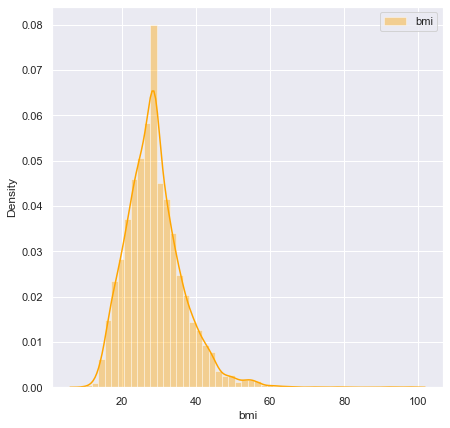

In [40]:
fig = plt.figure(figsize=(7,7))
sns.distplot(data.bmi, color="orange", label="bmi", kde= True)
plt.legend()

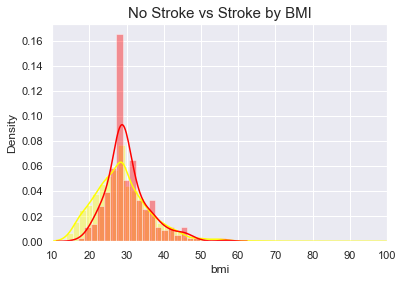

In [45]:

sns.distplot(data[data['stroke'] == 0]["bmi"], color='yellow') 
sns.distplot(data[data['stroke'] == 1]["bmi"], color='red') 

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

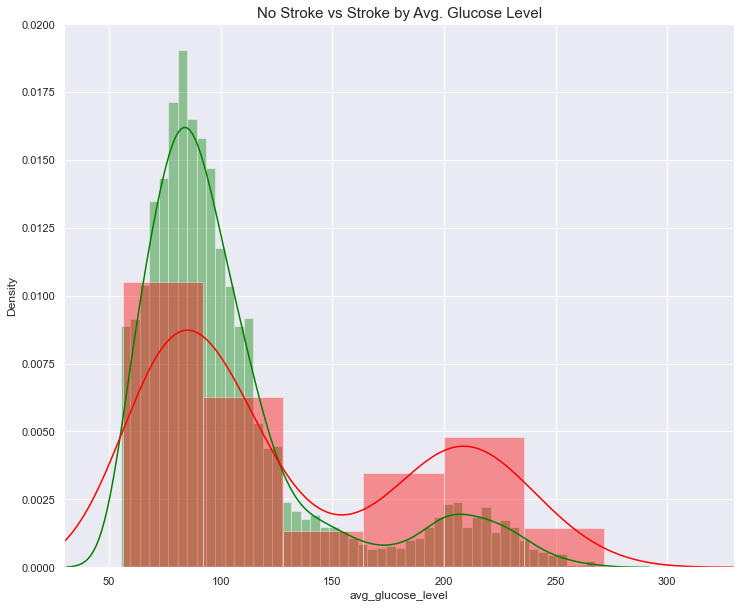

In [47]:
plt.figure(figsize=(12,10))

sns.distplot(data[data['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

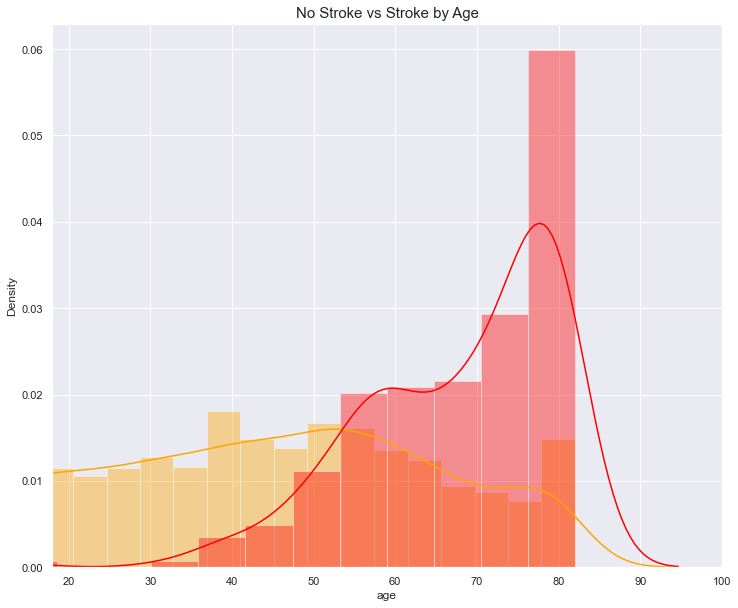

In [49]:
plt.figure(figsize=(12,10))

sns.distplot(data[data['stroke'] == 0]["age"], color='orange') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

In [5]:
dst_st_age = data.groupby(['age', 'stroke']).agg({'stroke': 'count'}).rename(columns = {'stroke': 'count'}).reset_index()
dst_st_age.iloc[[0, 2, 4, 6], 1] = "didn't have a stroke"
dst_st_age.iloc[[1, 3, 5, 7], 1] = "had a stroke"

dst_st_age.head(10)

age                stroke  count
0  0.08  didn't have a stroke      2
1  0.16          had a stroke      3
2  0.24  didn't have a stroke      5
3  0.32          had a stroke      5
4  0.40  didn't have a stroke      2
5  0.48          had a stroke      3
6  0.56  didn't have a stroke      5
7  0.64          had a stroke      4
8  0.72                     0      5
9  0.80                     0      4

In [6]:
dst_st_gen = data.query('gender != "Other"').groupby(['gender', 'stroke']).agg({'stroke': 'count'}).rename(columns = {'stroke': 'count'}).reset_index()
dst_st_gen.iloc[[0, 2], 1] = "didn't have a stroke"
dst_st_gen.iloc[[1, 3], 1] = "had a stroke"
dst_st_gen

gender                stroke  count
0  Female  didn't have a stroke   2853
1  Female          had a stroke    141
2    Male  didn't have a stroke   2007
3    Male          had a stroke    108

In [7]:
fig = px.sunburst(dst_st_gen, path = ['gender', 'stroke'], values = 'count', color = 'gender',
                 color_discrete_map = {'Female': '#e381bc', 'Male': '#81a8e3'})

fig.update_layout(annotations = [dict(text = 'Distribution of stroke by gender', 
                                      x = 0.5, y = 1.15, font_size = 24, showarrow = False, 
                                      font_family = 'Arial Black',
                                      font_color = 'black')])

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

In [8]:
hyper = data.groupby(['hypertension', 'stroke']).agg({'stroke': 'count'}).rename(columns = {'stroke': 'count'}).reset_index()
hyper.iloc[[0, 1], 0] = 'No hypertension'
hyper.iloc[[2, 3], 0] = 'Yes hypertension'
hyper.iloc[[0, 2], 1] = "didn't have a stroke"
hyper.iloc[[1, 3], 1] = "had a stroke"
hyper

hypertension                stroke  count
0   No hypertension  didn't have a stroke   4429
1   No hypertension          had a stroke    183
2  Yes hypertension  didn't have a stroke    432
3  Yes hypertension          had a stroke     66

In [64]:
fig = px.sunburst(hyper, path = ['stroke', 'hypertension'], values = 'count', color = 'stroke',
                 color_discrete_map = {"didn't have a stroke": '#1092c9', "had a stroke": '#c91010'},
                 width = 700, height = 700)

fig.update_layout(annotations = [dict(text = 'Affect of hypertension on stroke risk', 
                                      x = 0.5, y = 1.1, font_size = 24, showarrow = False, 
                                      font_family = 'Arial Black',
                                      font_color = 'black')])

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

In [65]:
heart = data.groupby(['heart_disease', 'stroke']).agg({'stroke': 'count'}).rename(columns = {'stroke': 'count'}).reset_index()
heart.iloc[[0, 1], 0] = 'No heart diseases'
heart.iloc[[2, 3], 0] = 'Yes heart diseases'
heart.iloc[[0, 2], 1] = "didn't have a stroke"
heart.iloc[[1, 3], 1] = "had a stroke"
heart

heart_disease                stroke  count
0   No heart diseases  didn't have a stroke   4632
1   No heart diseases          had a stroke    202
2  Yes heart diseases  didn't have a stroke    229
3  Yes heart diseases          had a stroke     47

In [66]:
fig = px.sunburst(heart, path = ['stroke', 'heart_disease'], values = 'count', color = 'stroke',
                 color_discrete_map = {"didn't have a stroke": '#1092c9', "had a stroke": '#c91010'},
                 width = 700, height = 700)

fig.update_layout(annotations = [dict(text = 'Affect of heart diseases on stroke risk', 
                                      x = 0.5, y = 1.1, font_size = 24, showarrow = False, 
                                      font_family = 'Arial Black',
                                      font_color = 'black')])

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

### Age vs glucose level

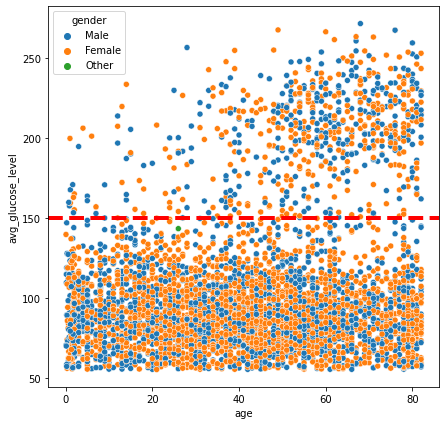

In [53]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=data, x="age", y="avg_glucose_level", hue='gender')
graph.axhline(y= 150, linewidth=4, color='r', linestyle= '--')
plt.show()

### Age vs bmi

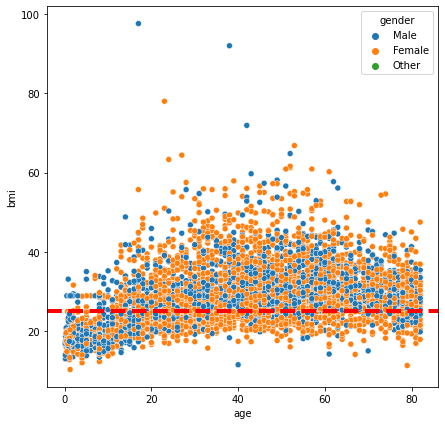

In [54]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=data, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')
plt.show()

<Figure size 720x720 with 0 Axes>

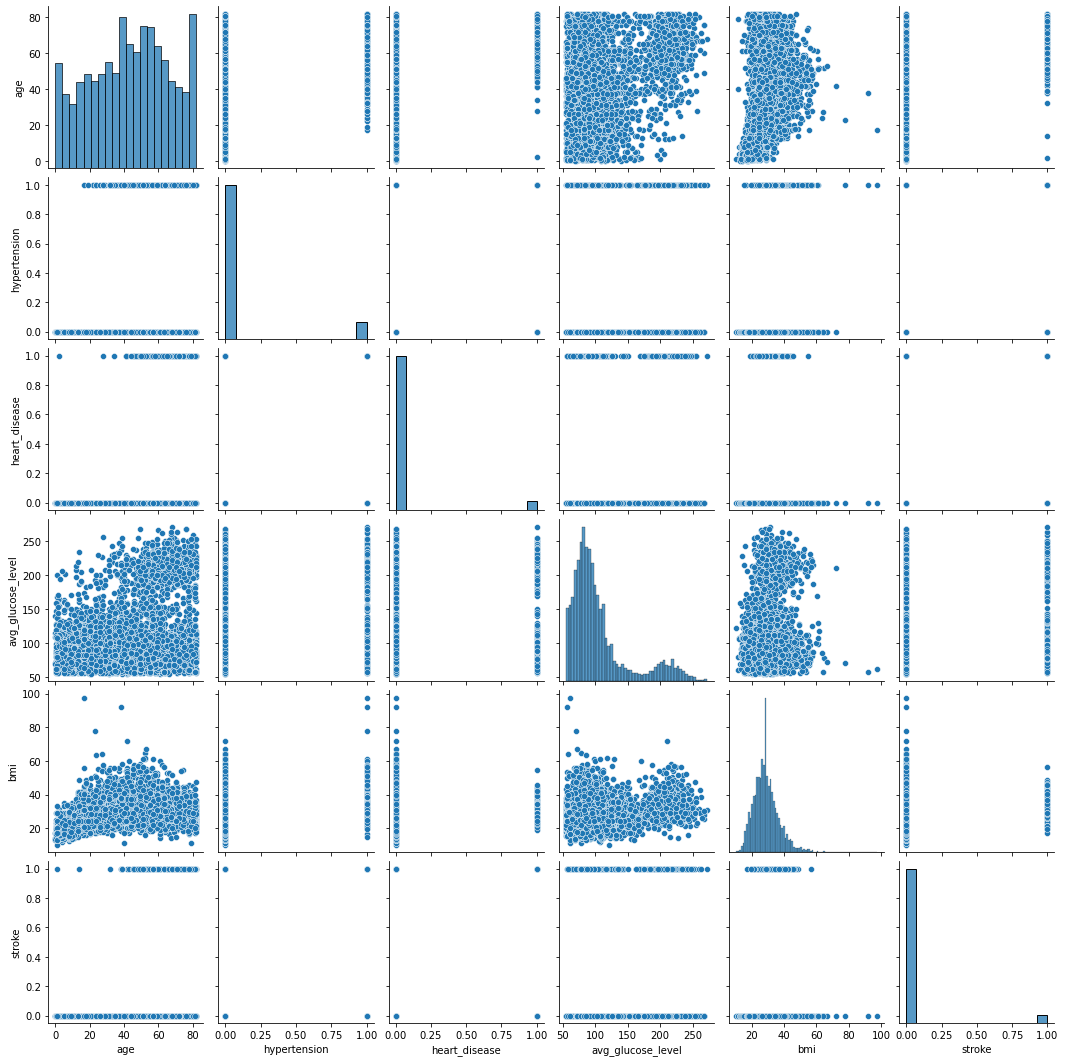

In [57]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data)
plt.show()

### Data Preprocessing

In [17]:
x = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [17]:
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban             228.69  36.600000   
1  Self-employed          Rural             202.21  28.893237   
2        Private          Rural             105.92  32.500000   
3        Private          Urban             171.23  34.400000   
4  Self-employed          Rural             174.12  24.000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1

# Categorical encoding 
##-one hot encoding

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0,5,9])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))

In [19]:
x.shape

(5110, 19)

# Label Encoding
###for binary

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 15] = le.fit_transform(x[:, 15])
x[:, 16] = le.fit_transform(x[:, 16])

In [21]:
x

array([[0.0, 1.0, 0.0, ..., 1, 228.69, 36.6],
       [1.0, 0.0, 0.0, ..., 0, 202.21, 28.893236911794673],
       [0.0, 1.0, 0.0, ..., 0, 105.92, 32.5],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 82.99, 30.6],
       [0.0, 1.0, 0.0, ..., 0, 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 1, 85.28, 26.2]], dtype=object)

#### Splitting data into train and test

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)#random_state=seedvalue


In [60]:
data.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  5110.000000  5110.000000  
mean     28.893237     0.048728  
std       7.698018     0.215320  
min      10.300000     0.000000  
25%      23.800000     0.000000  
50%      28.400000     0.000000  
75%      32.800000     0.000000  
max      97.600000     1.000000

# Feature scaling

In [26]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [58]:
!pip install imbalanced-learn

In [28]:
import imblearn 

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 195
Before OverSampling, counts of label '0': 3893 

After OverSampling, the shape of train_X: (7786, 19)
After OverSampling, the shape of train_y: (7786,) 

After OverSampling, counts of label '1': 3893
After OverSampling, counts of label '0': 3893


### Training

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [68]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix, precision_score,recall_score
from sklearn.model_selection import cross_val_score

## Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [91]:
lr.fit(x_train_res,y_train_res)

LogisticRegression()

In [132]:
y_pred_lr=lr.predict(x_test)

In [133]:
cm_lr=confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[723, 245],
       [ 12,  42]], dtype=int64)

In [134]:
accuracy_lr=accuracy_score(y_test, y_pred_lr)

In [135]:
precision_lr = precision_score(y_test, y_pred_lr)
precision_lr

0.14634146341463414

In [136]:
roc_lr = roc_auc_score(y_test, y_pred_lr)
roc_lr    

0.7623393021120293

In [137]:
recall_lr = recall_score(y_test, y_pred_lr) 
recall_lr

0.7777777777777778

In [138]:
f1_lr = f1_score(y_test, y_pred_lr)
f1_lr

0.24633431085043986

## KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()


In [123]:
knn.fit(x_train_res,y_train_res)

KNeighborsClassifier()

In [124]:
y_pred_knn=knn.predict(x_test)

In [125]:
accuracy_knn=accuracy_score(y_test,y_pred_knn)
accuracy_knn

0.8072407045009785

In [126]:
cm_knn=confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[809, 159],
       [ 38,  16]], dtype=int64)

In [127]:
precision_knn = precision_score(y_test, y_pred_knn)
precision_knn

0.09142857142857143

In [128]:
roc = roc_auc_score(y_test, y_pred_knn)
roc    

0.5660200489745945

In [129]:
recall = recall_score(y_test, y_pred_knn) 
recall

0.2962962962962963

In [130]:
f1 = f1_score(y_test, y_pred_knn)
f1

0.13973799126637554

## RandomForest

In [131]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [112]:
rf.fit(x_train_res,y_train_res)

RandomForestClassifier()

In [114]:
y_pred_rf=rf.predict(x_test)

In [115]:
accuracy_rf=accuracy_score(y_test,y_pred_rf)
accuracy_rf

0.910958904109589

In [116]:
cm_rf=confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[924,  44],
       [ 47,   7]], dtype=int64)

In [118]:
precision_rf = precision_score(y_test, y_pred_rf)
precision_rf

0.13725490196078433

In [119]:
roc_rf = roc_auc_score(y_test, y_pred_rf)
roc_rf    

0.5420875420875421

In [121]:
recall_rf = recall_score(y_test, y_pred_rf) 
recall_rf

0.12962962962962962

In [122]:
f1_rf = f1_score(y_test, y_pred_rf)
f1_rf

0.13333333333333333

## DecisionTree

In [140]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()

In [141]:
dt.fit(x_train_res,y_train_res)

DecisionTreeClassifier()

In [142]:
y_pred_dt=dt.predict(x_test)

In [143]:
accuracy_dt=accuracy_score(y_test,y_pred_dt)
accuracy_dt

0.8698630136986302

In [144]:
cm_dt=confusion_matrix(y_test, y_pred_dt)
cm_dt

array([[874,  94],
       [ 39,  15]], dtype=int64)

In [145]:
precision_dt = precision_score(y_test, y_pred_dt)
precision_dt

0.13761467889908258

In [146]:
roc_dt = roc_auc_score(y_test, y_pred_dt)
roc_dt    

0.5903351698806244

In [147]:
recall_dt = recall_score(y_test, y_pred_dt) 
recall_dt

0.2777777777777778

In [148]:
f1_dt = f1_score(y_test, y_pred_dt)
f1_dt

0.18404907975460125

In [155]:
from sklearn.svm import SVC
svc=SVC()

In [156]:
svc.fit(x_train_res,y_train_res)

SVC()

In [157]:
y_pred_svc=dt.predict(x_test)

In [158]:
accuracy_svc=accuracy_score(y_test,y_pred_svc)
accuracy_svc

0.8698630136986302

In [159]:
cm_svc=confusion_matrix(y_test, y_pred_svc)
cm_svc

array([[874,  94],
       [ 39,  15]], dtype=int64)

In [160]:
precision_svc = precision_score(y_test, y_pred_svc)
precision_svc

0.13761467889908258

In [161]:
roc_svc = roc_auc_score(y_test, y_pred_svc)
roc_svc    

0.5903351698806244

In [162]:
recall_svc= recall_score(y_test, y_pred_svc) 
recall_svc

0.2777777777777778

In [163]:
f1_svc = f1_score(y_test, y_pred_svc)
f1_svc

0.18404907975460125

## Displaying Accuracy

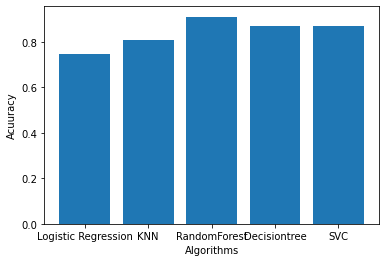

In [167]:
plt.bar(['Logistic Regression','KNN','RandomForest',  'Decisiontree','SVC'],[accuracy_lr,accuracy_knn,accuracy_rf,accuracy_dt,accuracy_svc])
plt.xlabel("Algorithms")
plt.ylabel("Acuuracy")
plt.show()